In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crime_Incidents_-_2025.csv')
df.head()

,X,Y,CCN,REPORT_DAT,START_DATE,END_DATE,BLOCK,OFFENSE,METHOD,SHIFT,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,BID,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
0,405684.5761,135633.8979,10133557,2025/06/30 04:00:00+00,2010/09/15 00:45:00+00,2010/09/14 04:00:00+00,4600 - 4699 BLOCK OF A STREET SE,HOMICIDE,GUN,MIDNIGHT,...,009906 1,9906.0,Precinct 104,NaN,405684.576067,135633.897851,38.888528,-76.934478,869155443,NaN
1,399950.1386,130512.4788,17194618,2025/06/30 04:00:00+00,2017/11/09 20:44:00+00,2017/11/09 22:57:34+00,3200 - 3299 BLOCK OF 4TH STREET SE,HOMICIDE,GUN,MIDNIGHT,...,009804 2,9804.0,Precinct 122,NaN,399950.138558,130512.478775,38.842411,-77.000574,869155850,NaN
2,398328.3100,138650.9000,24166858,2025/02/13 05:00:00+00,2024/10/27 09:04:00+00,NaN,500 - 603 BLOCK OF T STREET NW,HOMICIDE,OTHERS,MIDNIGHT,...,003400 3,3400.0,Precinct 37,NaN,398328.310000,138650.900000,38.915723,-77.019276,869460050,NaN
3,399953.0600,137804.5900,25000785,2025/01/02 19:47:12+00,2025/01/02 18:48:00+00,2025/01/02 19:40:00+00,300 - 399 BLOCK OF MORSE STREET NE,THEFT F/AUTO,OTHERS,DAY,...,008803 2,8803.0,Precinct 76,NaN,399953.060000,137804.590000,38.908101,-77.000541,869460173,NaN
4,394544.3700,141442.1100,25001129,2025/01/03 17:12:43+00,2025/01/03 12:22:00+00,2025/01/03 14:07:00+00,3000 - 3029 BLOCK OF TILDEN STREET NW,THEFT/OTHER,OTHERS,DAY,...,000600 1,600.0,Precinct 27,NaN,394544.370000,141442.110000,38.940852,-77.062930,869460174,NaN


In [3]:
df.shape

(24148, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24148 entries, 0 to 24147
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     24148 non-null  float64
 1   Y                     24148 non-null  float64
 2   CCN                   24148 non-null  int64  
 3   REPORT_DAT            24148 non-null  object 
 4   START_DATE            24148 non-null  object 
 5   END_DATE              22457 non-null  object 
 6   BLOCK                 24148 non-null  object 
 7   OFFENSE               24148 non-null  object 
 8   METHOD                24148 non-null  object 
 9   SHIFT                 24148 non-null  object 
 10  WARD                  24148 non-null  int64  
 11  ANC                   24148 non-null  object 
 12  DISTRICT              24116 non-null  float64
 13  PSA                   24116 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  24148 non-null  object 
 15  BLOCK_GROUP        

In [5]:
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'], utc=True)
df['START_DATE'] = pd.to_datetime(df['START_DATE'], utc=True)
df['END_DATE'] = pd.to_datetime(df['END_DATE'], utc=True, errors='coerce')

In [6]:
cat_cols=list(df.dtypes[df.dtypes=='object'].index)
df[cat_cols].head()


,BLOCK,OFFENSE,METHOD,SHIFT,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,VOTING_PRECINCT,BID
0,4600 - 4699 BLOCK OF A STREET SE,HOMICIDE,GUN,MIDNIGHT,7E,Cluster 33,009906 1,Precinct 104,NaN
1,3200 - 3299 BLOCK OF 4TH STREET SE,HOMICIDE,GUN,MIDNIGHT,8C,Cluster 39,009804 2,Precinct 122,NaN
2,500 - 603 BLOCK OF T STREET NW,HOMICIDE,OTHERS,MIDNIGHT,1B,Cluster 3,003400 3,Precinct 37,NaN
3,300 - 399 BLOCK OF MORSE STREET NE,THEFT F/AUTO,OTHERS,DAY,5D,Cluster 23,008803 2,Precinct 76,NaN
4,3000 - 3029 BLOCK OF TILDEN STREET NW,THEFT/OTHER,OTHERS,DAY,3C,Cluster 12,000600 1,Precinct 27,NaN


In [7]:
df[cat_cols].shape

(24148, 9)

In [8]:
num_cols=list(df.dtypes[df.dtypes!='object'].index)
df[num_cols].head()

,X,Y,CCN,REPORT_DAT,START_DATE,END_DATE,WARD,DISTRICT,PSA,CENSUS_TRACT,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
0,405684.5761,135633.8979,10133557,2025-06-30 04:00:00+00:00,2010-09-15 00:45:00+00:00,2010-09-14 04:00:00+00:00,7,6.0,604.0,9906.0,405684.576067,135633.897851,38.888528,-76.934478,869155443,NaN
1,399950.1386,130512.4788,17194618,2025-06-30 04:00:00+00:00,2017-11-09 20:44:00+00:00,2017-11-09 22:57:34+00:00,8,7.0,705.0,9804.0,399950.138558,130512.478775,38.842411,-77.000574,869155850,NaN
2,398328.3100,138650.9000,24166858,2025-02-13 05:00:00+00:00,2024-10-27 09:04:00+00:00,NaT,1,3.0,306.0,3400.0,398328.310000,138650.900000,38.915723,-77.019276,869460050,NaN
3,399953.0600,137804.5900,25000785,2025-01-02 19:47:12+00:00,2025-01-02 18:48:00+00:00,2025-01-02 19:40:00+00:00,5,5.0,501.0,8803.0,399953.060000,137804.590000,38.908101,-77.000541,869460173,NaN
4,394544.3700,141442.1100,25001129,2025-01-03 17:12:43+00:00,2025-01-03 12:22:00+00:00,2025-01-03 14:07:00+00:00,3,2.0,203.0,600.0,394544.370000,141442.110000,38.940852,-77.062930,869460174,NaN


In [9]:
df[num_cols].shape

(24148, 16)

In [10]:
df.isnull().sum()

,0
X,0
Y,0
CCN,0
REPORT_DAT,0
START_DATE,0
END_DATE,1691
BLOCK,0
OFFENSE,0
METHOD,0
SHIFT,0


In [11]:
print("Duplicate rows:", df.duplicated().sum())
print("Duplicate CCN:", df.duplicated(subset=["CCN"]).sum())

Duplicate rows: 0
Duplicate CCN: 3


In [12]:
df = df.drop_duplicates(subset=["CCN"])


In [13]:
missing_flag_cols = ["END_DATE", "DISTRICT", "PSA", "BLOCK_GROUP", "CENSUS_TRACT", "BID", "OCTO_RECORD_ID"]
for c in missing_flag_cols:
    df[c + "_MISSING"] = df[c].isna().astype(int)


In [14]:
#OCTO_RECORD_ID is 100% missing (24148 missing out of 24148) → drop it.
df = df.drop(columns=["OCTO_RECORD_ID"])


In [15]:

#BID is mostly missing (~19k missing) → either drop OR keep as category with “Unknown”.
df["BID"] = df["BID"].fillna("Unknown")


In [16]:
#for numerical values
df["DISTRICT"] = df["DISTRICT"].fillna(0)
df["PSA"] = df["PSA"].fillna(0)
df["CENSUS_TRACT"] = df["CENSUS_TRACT"].fillna(0)
df["BLOCK_GROUP"] = df["BLOCK_GROUP"].fillna("Unknown")


### Outliers / suspicious data checks


In [17]:
#Coordinate sanity (DC approx lat 38–39, lon -77)
bad_coords = df[(df["LATITUDE"] < 37) | (df["LATITUDE"] > 40) | (df["LONGITUDE"] > -75) | (df["LONGITUDE"] < -79)]
print("Suspicious coordinate rows:", bad_coords.shape[0])


Suspicious coordinate rows: 0


In [18]:
#Time sanity (END_DATE earlier than START_DATE)
bad_time = df[(df["END_DATE"].notna()) & (df["START_DATE"].notna()) & (df["END_DATE"] < df["START_DATE"])]
print("END_DATE < START_DATE rows:", bad_time.shape[0])


END_DATE < START_DATE rows: 1


In [19]:
df.loc[df["END_DATE"] < df["START_DATE"], "END_DATE"] = pd.NaT


## EDA visualizations

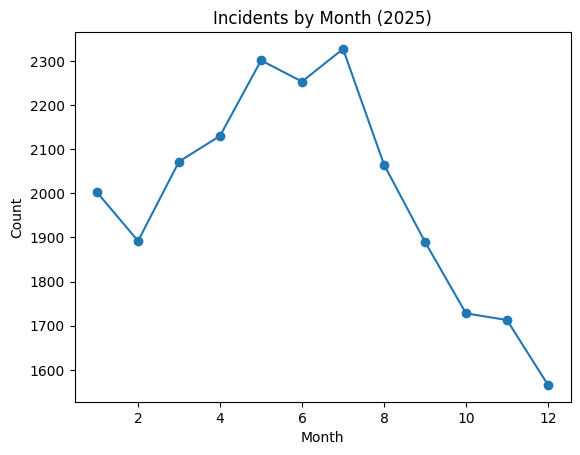

In [20]:
df["YEAR"] = df["START_DATE"].dt.year
df_2025 = df[df["YEAR"] == 2025].copy()

df_2025["MONTH"] = df_2025["START_DATE"].dt.month
monthly = df_2025.groupby("MONTH").size()

plt.figure()
plt.plot(monthly.index, monthly.values, marker="o")
plt.title("Incidents by Month (2025)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


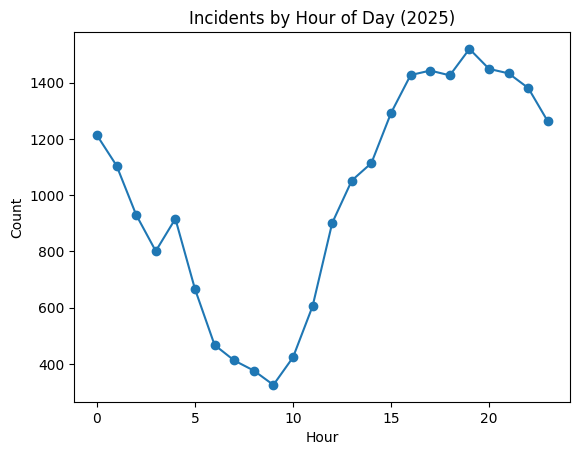

In [21]:
df_2025["HOUR"] = df_2025["START_DATE"].dt.hour
hourly = df_2025.groupby("HOUR").size()

plt.figure()
plt.plot(hourly.index, hourly.values, marker="o")
plt.title("Incidents by Hour of Day (2025)")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


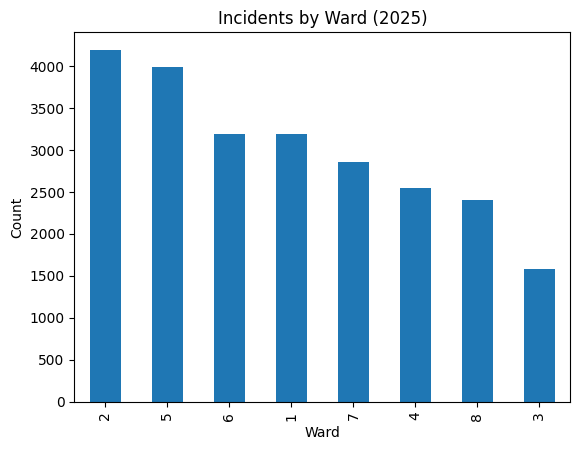

In [22]:
ward_counts = df_2025["WARD"].value_counts()

plt.figure()
ward_counts.plot(kind="bar")
plt.title("Incidents by Ward (2025)")
plt.xlabel("Ward")
plt.ylabel("Count")
plt.show()


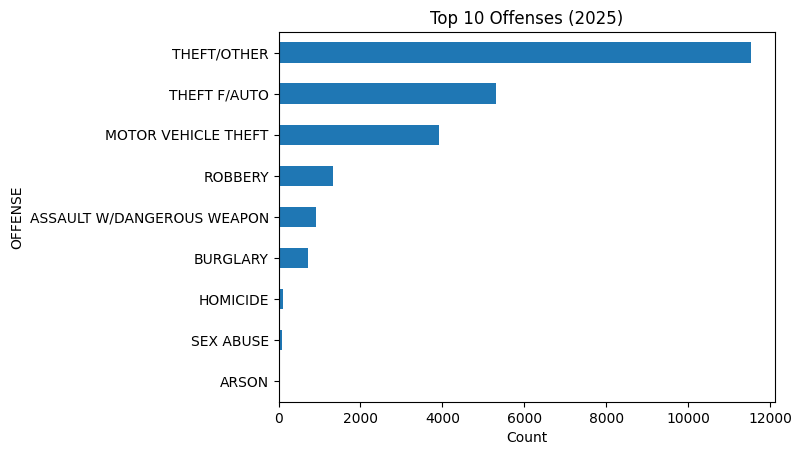

In [23]:
top_off = df_2025["OFFENSE"].value_counts().head(10)

plt.figure()
top_off.sort_values().plot(kind="barh")
plt.title("Top 10 Offenses (2025)")
plt.xlabel("Count")
plt.show()


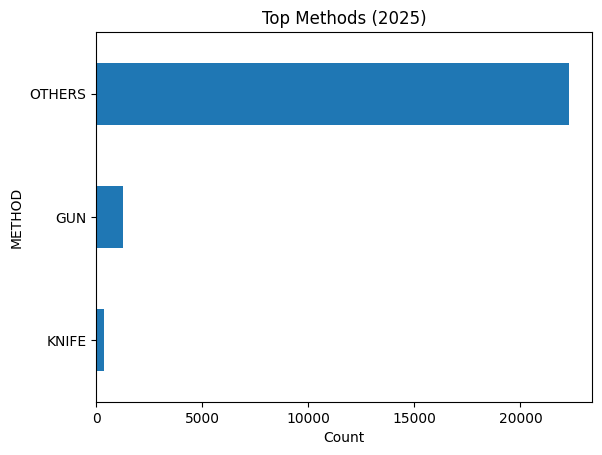

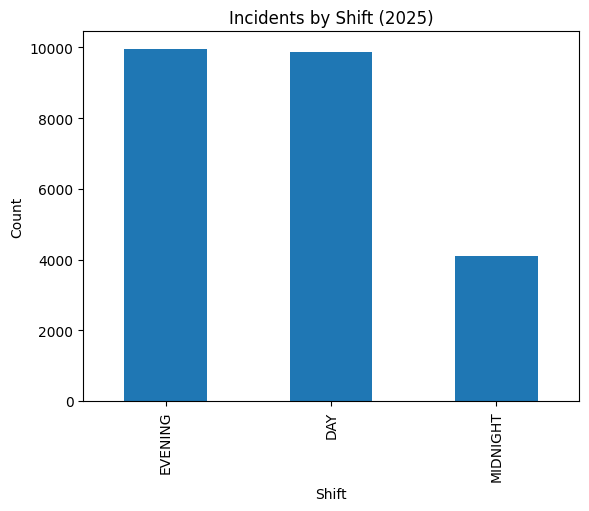

In [24]:
plt.figure()
df_2025["METHOD"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top Methods (2025)")
plt.xlabel("Count")
plt.show()

plt.figure()
df_2025["SHIFT"].value_counts().plot(kind="bar")
plt.title("Incidents by Shift (2025)")
plt.xlabel("Shift")
plt.ylabel("Count")
plt.show()


## Research questions

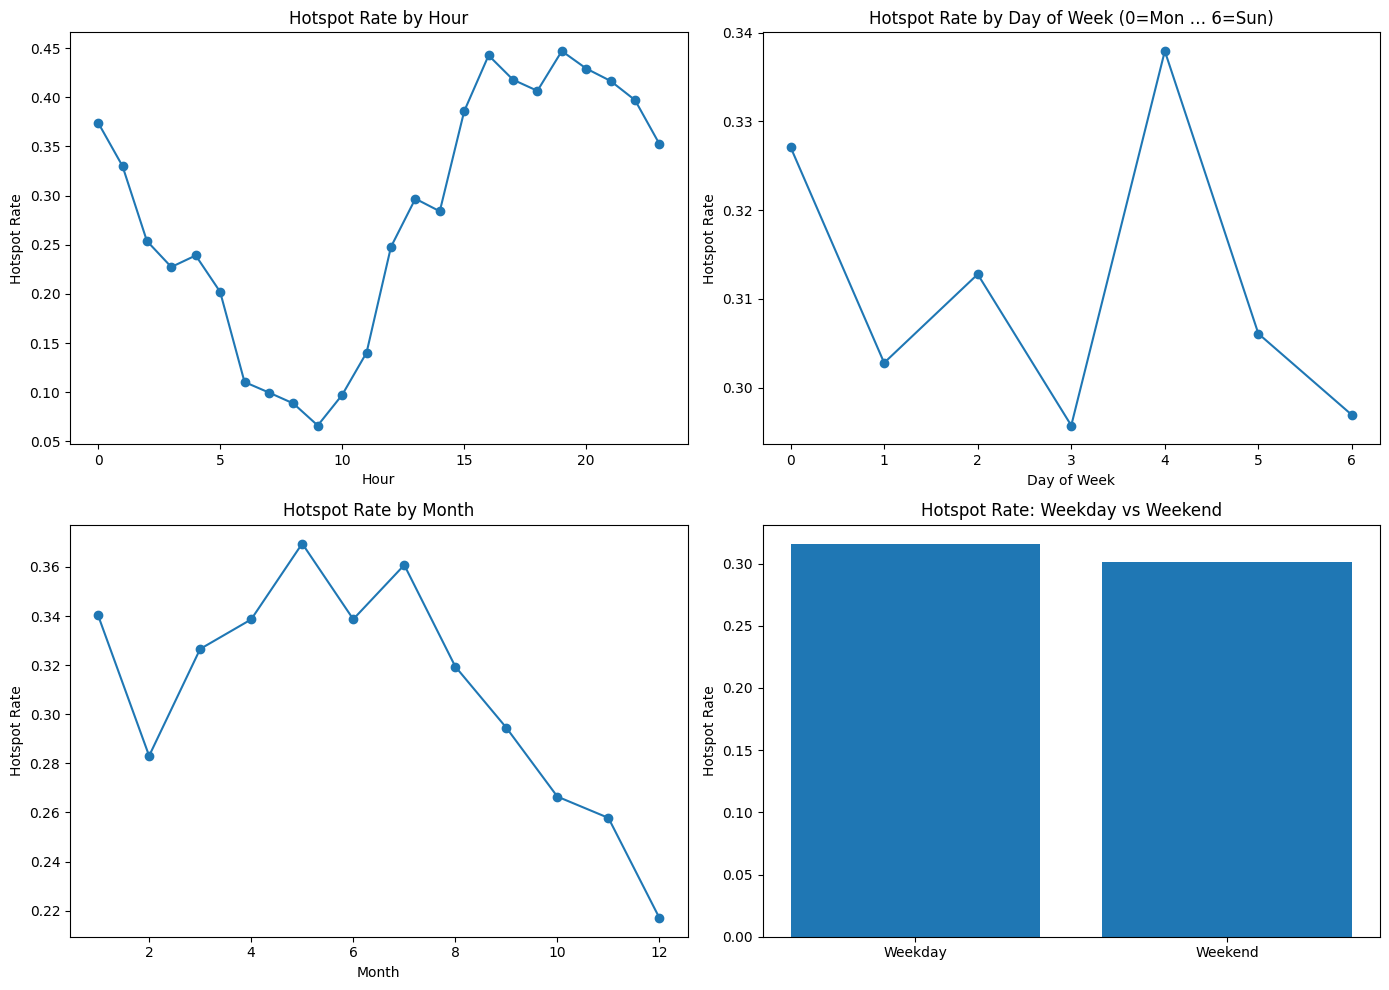

In [65]:
#How do crime hotspots vary by time of day, day of the week, and month?
# RQ1: Temporal variation of crime hotspots

import matplotlib.pyplot as plt

# Use combined dataset for EDA
eda_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

plt.figure(figsize=(14, 10))

# 1️⃣ Hotspot rate by hour
plt.subplot(2, 2, 1)
hot_by_hour = eda_df.groupby("HOUR")["HOTSPOT"].mean()
plt.plot(hot_by_hour.index, hot_by_hour.values, marker="o")
plt.title("Hotspot Rate by Hour")
plt.xlabel("Hour")
plt.ylabel("Hotspot Rate")

# 2️⃣ Hotspot rate by day of week
plt.subplot(2, 2, 2)
hot_by_dow = eda_df.groupby("DAY_OF_WEEK")["HOTSPOT"].mean()
plt.plot(hot_by_dow.index, hot_by_dow.values, marker="o")
plt.title("Hotspot Rate by Day of Week (0=Mon … 6=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Hotspot Rate")

# 3️⃣ Hotspot rate by month
plt.subplot(2, 2, 3)
hot_by_month = eda_df.groupby("MONTH")["HOTSPOT"].mean()
plt.plot(hot_by_month.index, hot_by_month.values, marker="o")
plt.title("Hotspot Rate by Month")
plt.xlabel("Month")
plt.ylabel("Hotspot Rate")

# 4️⃣ Weekday vs Weekend hotspot rate
plt.subplot(2, 2, 4)
hot_weekend = eda_df.groupby("IS_WEEKEND")["HOTSPOT"].mean()
plt.bar(["Weekday", "Weekend"], hot_weekend.values)
plt.title("Hotspot Rate: Weekday vs Weekend")
plt.ylabel("Hotspot Rate")

plt.tight_layout()
plt.show()


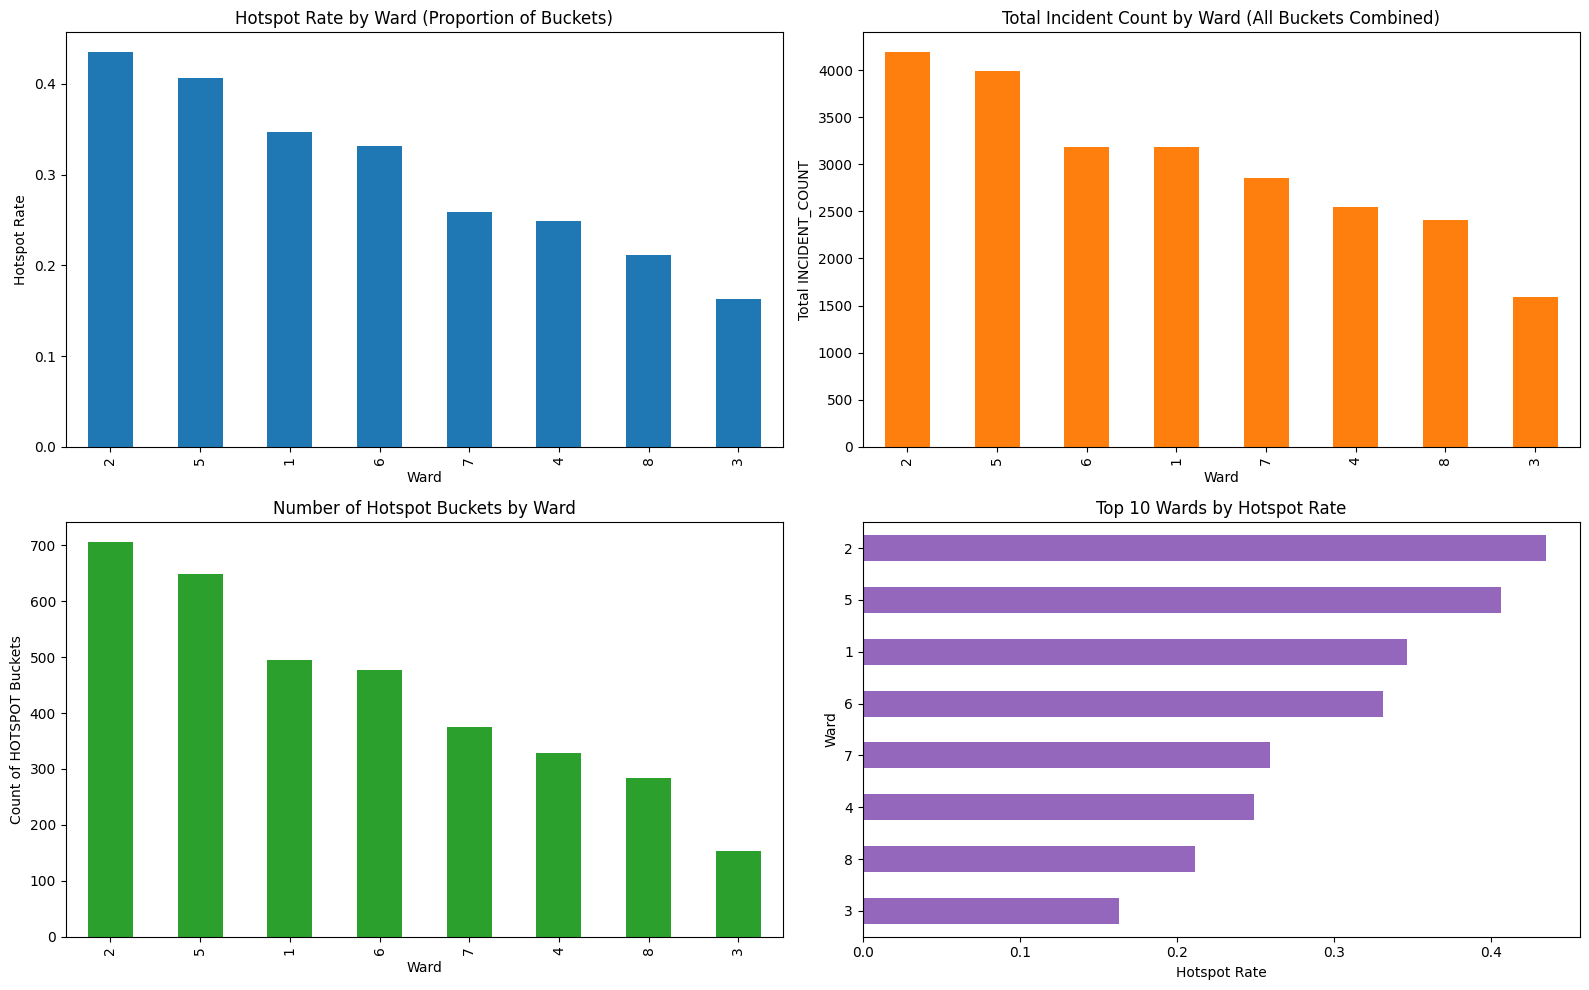

In [66]:
#RQ2: Are crime hotspots disproportionately concentrated in specific wards?
# RQ2: Spatial distribution of hotspots (by Ward)

import pandas as pd
import matplotlib.pyplot as plt

eda_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Hotspot rate per ward (proportion of buckets that are hotspots)
hot_rate_by_ward = eda_df.groupby("WARD")["HOTSPOT"].mean().sort_values(ascending=False)

# Total incident volume per ward (context)
total_incidents_by_ward = eda_df.groupby("WARD")["INCIDENT_COUNT"].sum().sort_values(ascending=False)

# Total hotspots per ward (count of hotspot buckets)
hotspots_count_by_ward = eda_df.groupby("WARD")["HOTSPOT"].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 10))

# 1️⃣ Hotspot rate by ward
plt.subplot(2, 2, 1)
hot_rate_by_ward.plot(kind="bar", color="tab:blue")
plt.title("Hotspot Rate by Ward (Proportion of Buckets)")
plt.xlabel("Ward")
plt.ylabel("Hotspot Rate")

# 2️⃣ Total incident counts by ward
plt.subplot(2, 2, 2)
total_incidents_by_ward.plot(kind="bar", color="tab:orange")
plt.title("Total Incident Count by Ward (All Buckets Combined)")
plt.xlabel("Ward")
plt.ylabel("Total INCIDENT_COUNT")

# 3️⃣ Number of hotspot buckets by ward
plt.subplot(2, 2, 3)
hotspots_count_by_ward.plot(kind="bar", color="tab:green")
plt.title("Number of Hotspot Buckets by Ward")
plt.xlabel("Ward")
plt.ylabel("Count of HOTSPOT Buckets")

# 4️⃣ Optional: Top 10 wards by hotspot rate (horizontal, cleaner for report)
plt.subplot(2, 2, 4)
hot_rate_by_ward.head(10).sort_values().plot(kind="barh", color="tab:purple")
plt.title("Top 10 Wards by Hotspot Rate")
plt.xlabel("Hotspot Rate")
plt.ylabel("Ward")

plt.tight_layout()
plt.show()

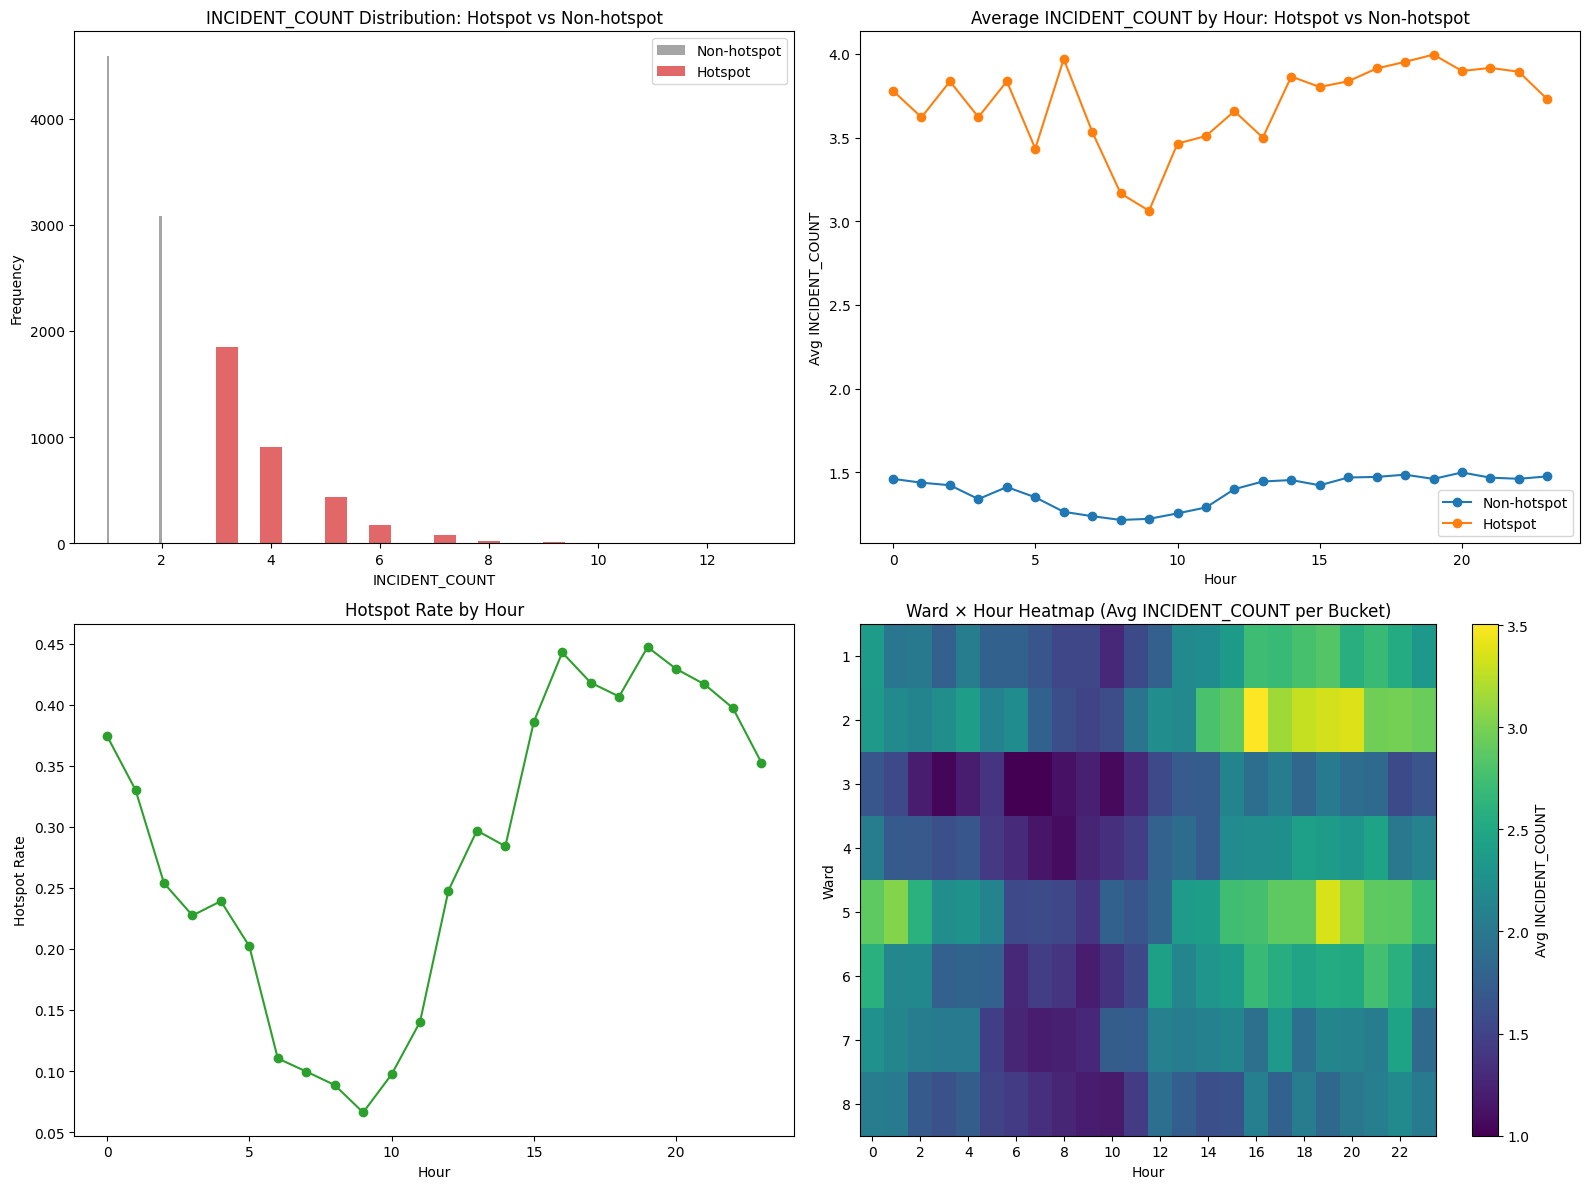

In [67]:
#RQ3 Which spatiotemporal characteristics are most strongly associated with hotspots?
# RQ3: Which spatiotemporal characteristics are most associated with hotspots?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eda_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

plt.figure(figsize=(16, 12))

# 1️⃣ Incident count distribution: hotspot vs non-hotspot
plt.subplot(2, 2, 1)
hot_counts = eda_df.loc[eda_df["HOTSPOT"] == 1, "INCIDENT_COUNT"]
nonhot_counts = eda_df.loc[eda_df["HOTSPOT"] == 0, "INCIDENT_COUNT"]

plt.hist(nonhot_counts, bins=25, alpha=0.7, label="Non-hotspot", color="tab:gray")
plt.hist(hot_counts, bins=25, alpha=0.7, label="Hotspot", color="tab:red")
plt.title("INCIDENT_COUNT Distribution: Hotspot vs Non-hotspot")
plt.xlabel("INCIDENT_COUNT")
plt.ylabel("Frequency")
plt.legend()

# 2️⃣ Average incident count by hour: hotspot vs non-hotspot
plt.subplot(2, 2, 2)
hour_profile = eda_df.groupby(["HOUR", "HOTSPOT"])["INCIDENT_COUNT"].mean().unstack()
plt.plot(hour_profile.index, hour_profile[0], marker="o", color="tab:blue", label="Non-hotspot")
plt.plot(hour_profile.index, hour_profile[1], marker="o", color="tab:orange", label="Hotspot")
plt.title("Average INCIDENT_COUNT by Hour: Hotspot vs Non-hotspot")
plt.xlabel("Hour")
plt.ylabel("Avg INCIDENT_COUNT")
plt.legend()

# 3️⃣ Hotspot rate by hour (direct signal used by model)
plt.subplot(2, 2, 3)
hot_rate_hour = eda_df.groupby("HOUR")["HOTSPOT"].mean()
plt.plot(hot_rate_hour.index, hot_rate_hour.values, marker="o", color="tab:green")
plt.title("Hotspot Rate by Hour")
plt.xlabel("Hour")
plt.ylabel("Hotspot Rate")

# 4️⃣ Ward × Hour heatmap: avg incident count per bucket (strong spatiotemporal signal)
plt.subplot(2, 2, 4)
pivot = eda_df.pivot_table(
    index="WARD",
    columns="HOUR",
    values="INCIDENT_COUNT",
    aggfunc="mean"
).fillna(0)

plt.imshow(pivot, aspect="auto")
plt.title("Ward × Hour Heatmap (Avg INCIDENT_COUNT per Bucket)")
plt.xlabel("Hour")
plt.ylabel("Ward")
plt.colorbar(label="Avg INCIDENT_COUNT")
plt.xticks(ticks=np.arange(0, 24, 2), labels=np.arange(0, 24, 2))
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)

plt.tight_layout()
plt.show()


In [25]:
#Feature engineering
df_2025["DAY_OF_WEEK"] = df_2025["START_DATE"].dt.dayofweek
df_2025["IS_WEEKEND"] = (df_2025["DAY_OF_WEEK"] >= 5).astype(int)


In [26]:
model_df = (
    df_2025.groupby(["WARD", "MONTH", "DAY_OF_WEEK", "HOUR", "IS_WEEKEND"])
           .size()
           .reset_index(name="INCIDENT_COUNT")
)

model_df.head(), model_df.shape


(   WARD  MONTH  DAY_OF_WEEK  HOUR  IS_WEEKEND  INCIDENT_COUNT
 0     1      1            0     0           0               1
 1     1      1            0     1           0               4
 2     1      1            0     2           0               1
 3     1      1            0     8           0               1
 4     1      1            0    10           0               3,
 (11140, 6))

In [27]:
#Create HOTSPOT target correctly (train-only threshold)
train_df = model_df[model_df["MONTH"] <= 8].copy()
val_df   = model_df[model_df["MONTH"] == 9].copy()
test_df  = model_df[model_df["MONTH"] >= 10].copy()

label_threshold = train_df["INCIDENT_COUNT"].quantile(0.75)

for d in (train_df, val_df, test_df):
    d["HOTSPOT"] = (d["INCIDENT_COUNT"] >= label_threshold).astype(int)

label_threshold, train_df["HOTSPOT"].mean()


(np.float64(3.0), np.float64(0.3352116367448565))

In [28]:
feature_cols = ["WARD", "MONTH", "DAY_OF_WEEK", "HOUR", "IS_WEEKEND"]

X_train = train_df[feature_cols].copy()
y_train = train_df["HOTSPOT"].copy()

X_val = val_df[feature_cols].copy()
y_val = val_df["HOTSPOT"].copy()

X_test = test_df[feature_cols].copy()
y_test = test_df["HOTSPOT"].copy()

print(X_train.shape, X_val.shape, X_test.shape)
print("Train hotspot rate:", y_train.mean(), "Val:", y_val.mean(), "Test:", y_test.mean())


(7631, 5) (910, 5) (2599, 5)
Train hotspot rate: 0.3352116367448565 Val: 0.2945054945054945 Test: 0.2474028472489419


In [29]:
#One-hot encode + align columns (no leakage)
X_train_enc = pd.get_dummies(X_train, columns=["WARD","MONTH","DAY_OF_WEEK","HOUR"], drop_first=False)
X_val_enc   = pd.get_dummies(X_val,   columns=["WARD","MONTH","DAY_OF_WEEK","HOUR"], drop_first=False)
X_test_enc  = pd.get_dummies(X_test,  columns=["WARD","MONTH","DAY_OF_WEEK","HOUR"], drop_first=False)

# Align to train columns (important!)
X_val_enc  = X_val_enc.reindex(columns=X_train_enc.columns, fill_value=0)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

print(X_train_enc.shape, X_val_enc.shape, X_test_enc.shape)


(7631, 48) (910, 48) (2599, 48)


In [30]:
#Helper: choose best probability threshold on validation
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

def find_best_threshold(model, X_val, y_val, metric="f1"):
    proba = model.predict_proba(X_val)[:, 1]
    thresholds = np.linspace(0.05, 0.95, 91)
    best = None

    for t in thresholds:
        pred = (proba >= t).astype(int)
        if metric == "f1":
            score = f1_score(y_val, pred, zero_division=0)
        elif metric == "recall":
            score = recall_score(y_val, pred, zero_division=0)
        else:
            raise ValueError("metric must be 'f1' or 'recall'")

        if best is None or score > best["score"]:
            best = {
                "threshold": t,
                "score": score,
                "precision": precision_score(y_val, pred, zero_division=0),
                "recall": recall_score(y_val, pred, zero_division=0),
                "f1": f1_score(y_val, pred, zero_division=0)
            }
    return best


In [31]:
#Helper: evaluation + confusion matrix + ROC/PR metrics
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, threshold, title="Model"):
    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= threshold).astype(int)

    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, zero_division=0)
    rec = recall_score(y_test, pred, zero_division=0)
    f1 = f1_score(y_test, pred, zero_division=0)
    roc = roc_auc_score(y_test, proba)
    pr  = average_precision_score(y_test, proba)

    print(f"\n=== {title} ===")
    print(f"Decision threshold = {threshold:.2f}")
    print(f"Accuracy={acc:.4f} Precision={prec:.4f} Recall={rec:.4f} F1={f1:.4f}")
    print(f"ROC_AUC={roc:.4f} PR_AUC={pr:.4f}")
    print(classification_report(y_test, pred, zero_division=0))

    cm = confusion_matrix(y_test, pred)
    ConfusionMatrixDisplay(cm, display_labels=["No Hotspot", "Hotspot"]).plot(values_format="d")
    plt.title(f"{title} – Confusion Matrix")
    plt.show()

    return {"Accuracy":acc,"Precision":prec,"Recall":rec,"F1":f1,"ROC_AUC":roc,"PR_AUC":pr,"Threshold":threshold}



=== Decision Tree (Baseline A2) ===
Decision threshold = 0.20
Accuracy=0.3594 Precision=0.2729 Recall=0.9549 F1=0.4245
ROC_AUC=0.6173 PR_AUC=0.3192
              precision    recall  f1-score   support

           0       0.92      0.16      0.28      1956
           1       0.27      0.95      0.42       643

    accuracy                           0.36      2599
   macro avg       0.59      0.56      0.35      2599
weighted avg       0.76      0.36      0.31      2599



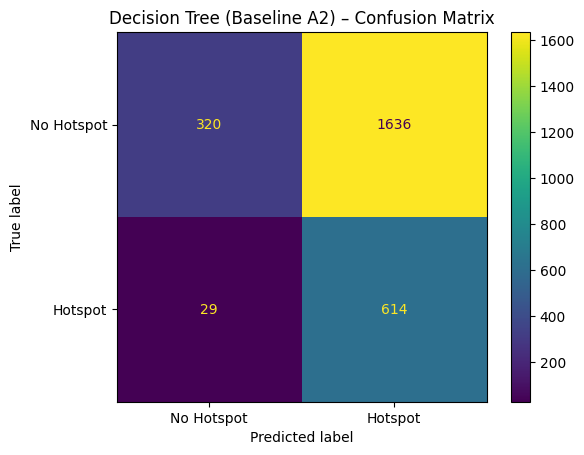


=== Random Forest (Baseline A2) ===
Decision threshold = 0.20
Accuracy=0.4686 Precision=0.2970 Recall=0.8398 F1=0.4388
ROC_AUC=0.6460 PR_AUC=0.3403
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      1956
           1       0.30      0.84      0.44       643

    accuracy                           0.47      2599
   macro avg       0.58      0.59      0.47      2599
weighted avg       0.73      0.47      0.48      2599



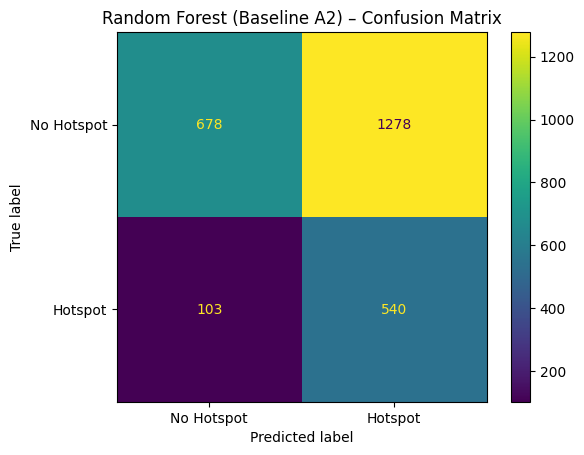


=== GBM (Baseline A2) ===
Decision threshold = 0.33
Accuracy=0.5906 Precision=0.3506 Recall=0.7683 F1=0.4815
ROC_AUC=0.7041 PR_AUC=0.4036
              precision    recall  f1-score   support

           0       0.87      0.53      0.66      1956
           1       0.35      0.77      0.48       643

    accuracy                           0.59      2599
   macro avg       0.61      0.65      0.57      2599
weighted avg       0.75      0.59      0.62      2599



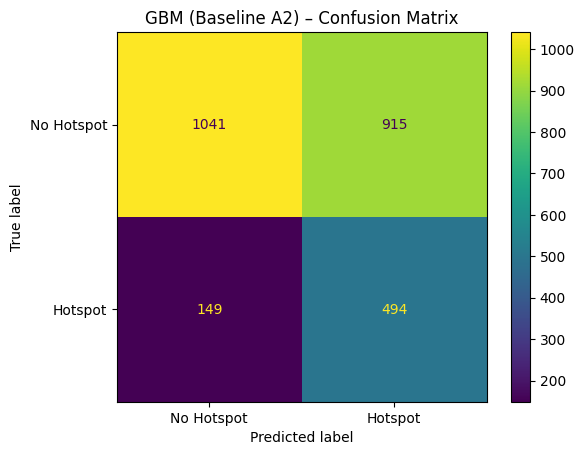


=== XGBoost (Baseline A2) ===
Decision threshold = 0.28
Accuracy=0.5360 Precision=0.3301 Recall=0.8507 F1=0.4757
ROC_AUC=0.7017 PR_AUC=0.3952
              precision    recall  f1-score   support

           0       0.90      0.43      0.58      1956
           1       0.33      0.85      0.48       643

    accuracy                           0.54      2599
   macro avg       0.61      0.64      0.53      2599
weighted avg       0.76      0.54      0.56      2599



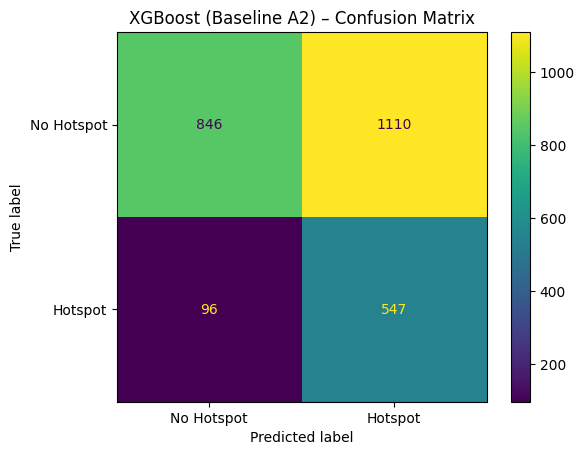

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC,Threshold
2,GBM,0.590612,0.350603,0.768274,0.481481,0.704119,0.403571,0.33
3,XGBoost,0.535975,0.330115,0.850700,0.475652,0.701686,0.395216,0.28
1,Random Forest,0.468642,0.297030,0.839813,0.438846,0.646002,0.340343,0.20
0,Decision Tree,0.359369,0.272889,0.954899,0.424473,0.617336,0.319185,0.20


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

baseline_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "GBM": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    )
}

results_a2 = []

for name, model in baseline_models.items():
    model.fit(X_train_enc, y_train)

    # Pick threshold using validation (choose metric="f1" or "recall")
    best = find_best_threshold(model, X_val_enc, y_val, metric="f1")
    t = best["threshold"]

    metrics = evaluate_model(model, X_test_enc, y_test, threshold=t, title=f"{name} (Baseline A2)")
    results_a2.append({"Model": name, **metrics})

pd.DataFrame(results_a2).sort_values("F1", ascending=False)


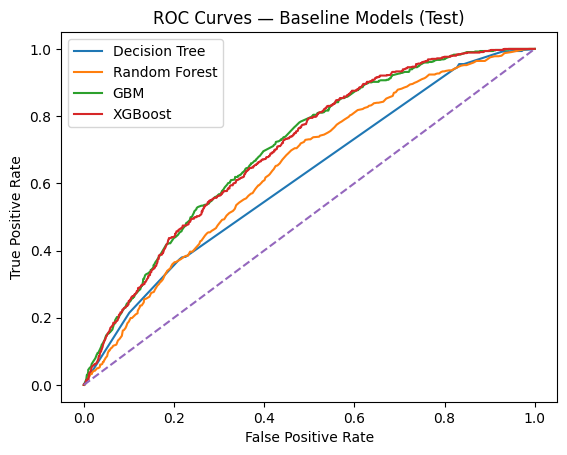

In [33]:
#Plot ROC curves for baseline models
from sklearn.metrics import roc_curve

plt.figure()
for name, model in baseline_models.items():
    proba = model.predict_proba(X_test_enc)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curves — Baseline Models (Test)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


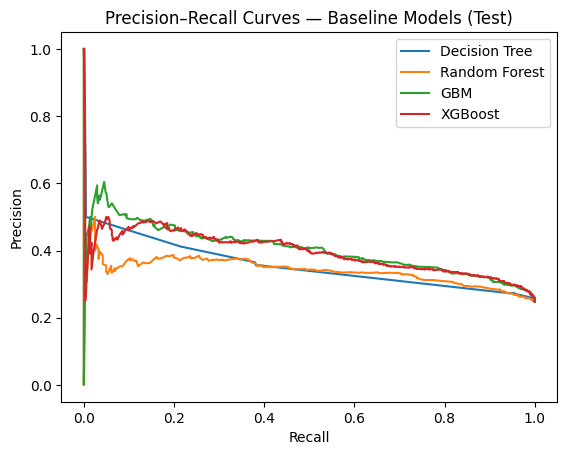

In [34]:
#Cell G — Plot Precision-Recall curves
from sklearn.metrics import precision_recall_curve

plt.figure()
for name, model in baseline_models.items():
    proba = model.predict_proba(X_test_enc)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, proba)
    plt.plot(rec, prec, label=name)

plt.title("Precision–Recall Curves — Baseline Models (Test)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [35]:
#Tuning GBM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

gbm_grid = {
    "n_estimators": [100, 200, 400],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [2, 3, 4],
    "subsample": [0.8, 1.0]
}

best_gbm = None

for n in gbm_grid["n_estimators"]:
    for lr in gbm_grid["learning_rate"]:
        for md in gbm_grid["max_depth"]:
            for ss in gbm_grid["subsample"]:
                model = GradientBoostingClassifier(
                    n_estimators=n,
                    learning_rate=lr,
                    max_depth=md,
                    subsample=ss,
                    random_state=42
                )
                model.fit(X_train_enc, y_train)

                # choose best threshold on VAL (your function)
                best_t = find_best_threshold(model, X_val_enc, y_val, metric="f1")["threshold"]

                proba_val = model.predict_proba(X_val_enc)[:, 1]
                pred_val = (proba_val >= best_t).astype(int)
                f1 = f1_score(y_val, pred_val, zero_division=0)

                if best_gbm is None or f1 > best_gbm["val_f1"]:
                    best_gbm = {"model": model, "val_f1": f1, "threshold": best_t,
                                "params": {"n_estimators": n, "learning_rate": lr, "max_depth": md, "subsample": ss}}

best_gbm["params"], best_gbm["val_f1"], best_gbm["threshold"]


({'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8},
 0.5458996328029376,
 np.float64(0.27999999999999997))


=== GBM (Tuned) ===
Decision threshold = 0.28
Accuracy=0.5414 Precision=0.3329 Recall=0.8507 F1=0.4786
ROC_AUC=0.7041 PR_AUC=0.4003
              precision    recall  f1-score   support

           0       0.90      0.44      0.59      1956
           1       0.33      0.85      0.48       643

    accuracy                           0.54      2599
   macro avg       0.62      0.65      0.53      2599
weighted avg       0.76      0.54      0.56      2599



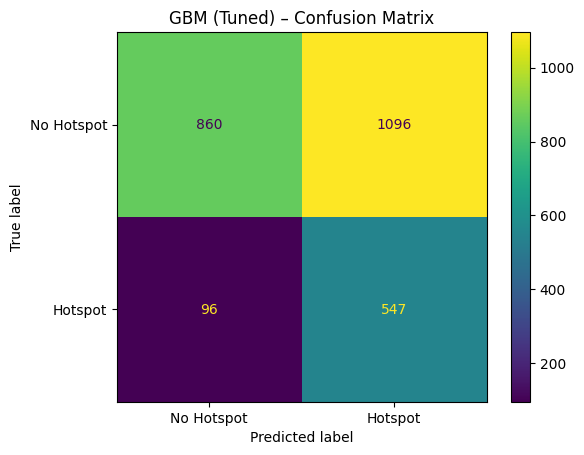

{'Accuracy': 0.5413620623316661,
 'Precision': 0.3329275715155204,
 'Recall': 0.8506998444790047,
 'F1': 0.4785651793525809,
 'ROC_AUC': np.float64(0.704085129457712),
 'PR_AUC': np.float64(0.4003299108233933),
 'Threshold': np.float64(0.27999999999999997)}

In [36]:
# Evaluate tuned GBM on TEST (confusion matrix etc.)
tuned_gbm_metrics = evaluate_model(
    best_gbm["model"], X_test_enc, y_test,
    threshold=best_gbm["threshold"],
    title="GBM (Tuned)"
)
tuned_gbm_metrics


In [37]:
#Tuning XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

xgb_grid = {
    "n_estimators": [300, 600],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

best_xgb = None

for n in xgb_grid["n_estimators"]:
    for lr in xgb_grid["learning_rate"]:
        for md in xgb_grid["max_depth"]:
            for ss in xgb_grid["subsample"]:
                for cs in xgb_grid["colsample_bytree"]:
                    model = XGBClassifier(
                        n_estimators=n,
                        learning_rate=lr,
                        max_depth=md,
                        subsample=ss,
                        colsample_bytree=cs,
                        eval_metric="logloss",
                        random_state=42,
                        n_jobs=-1
                    )
                    model.fit(X_train_enc, y_train)

                    best_t = find_best_threshold(model, X_val_enc, y_val, metric="f1")["threshold"]
                    proba_val = model.predict_proba(X_val_enc)[:, 1]
                    pred_val = (proba_val >= best_t).astype(int)
                    f1 = f1_score(y_val, pred_val, zero_division=0)

                    if best_xgb is None or f1 > best_xgb["val_f1"]:
                        best_xgb = {"model": model, "val_f1": f1, "threshold": best_t,
                                    "params": {"n_estimators": n, "learning_rate": lr, "max_depth": md,
                                               "subsample": ss, "colsample_bytree": cs}}

best_xgb["params"], best_xgb["val_f1"], best_xgb["threshold"]


({'n_estimators': 300,
  'learning_rate': 0.1,
  'max_depth': 3,
  'subsample': 0.8,
  'colsample_bytree': 0.8},
 0.5496932515337424,
 np.float64(0.27999999999999997))


=== XGBoost (Tuned) ===
Decision threshold = 0.28
Accuracy=0.5398 Precision=0.3321 Recall=0.8507 F1=0.4777
ROC_AUC=0.7037 PR_AUC=0.3955
              precision    recall  f1-score   support

           0       0.90      0.44      0.59      1956
           1       0.33      0.85      0.48       643

    accuracy                           0.54      2599
   macro avg       0.62      0.64      0.53      2599
weighted avg       0.76      0.54      0.56      2599



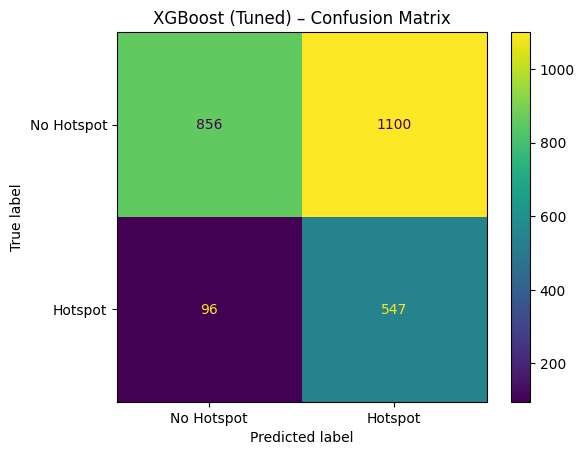

{'Accuracy': 0.5398230088495575,
 'Precision': 0.3321190042501518,
 'Recall': 0.8506998444790047,
 'F1': 0.4777292576419214,
 'ROC_AUC': np.float64(0.7037114338145262),
 'PR_AUC': np.float64(0.3955423907083346),
 'Threshold': np.float64(0.27999999999999997)}

In [38]:
#Evaluate tuned XGB on TEST
tuned_xgb_metrics = evaluate_model(
    best_xgb["model"], X_test_enc, y_test,
    threshold=best_xgb["threshold"],
    title="XGBoost (Tuned)"
)
tuned_xgb_metrics


In [39]:
compare = pd.DataFrame([
    {"Model":"GBM (Baseline)", **results_a2[2]},   # adjust index based on your list
    {"Model":"XGBoost (Baseline)", **results_a2[3]},
    {"Model":"GBM (Tuned)", **tuned_gbm_metrics},
    {"Model":"XGBoost (Tuned)", **tuned_xgb_metrics},
])
compare


,Model,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC,Threshold
0,GBM,0.590612,0.350603,0.768274,0.481481,0.704119,0.403571,0.33
1,XGBoost,0.535975,0.330115,0.850700,0.475652,0.701686,0.395216,0.28
2,GBM (Tuned),0.541362,0.332928,0.850700,0.478565,0.704085,0.400330,0.28
3,XGBoost (Tuned),0.539823,0.332119,0.850700,0.477729,0.703711,0.395542,0.28



=== HistGB (A3 Baseline) ===
Decision threshold = 0.27
Accuracy=0.5317 Precision=0.3258 Recall=0.8351 F1=0.4688
ROC_AUC=0.6867 PR_AUC=0.3866
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      1956
           1       0.33      0.84      0.47       643

    accuracy                           0.53      2599
   macro avg       0.61      0.63      0.53      2599
weighted avg       0.75      0.53      0.55      2599



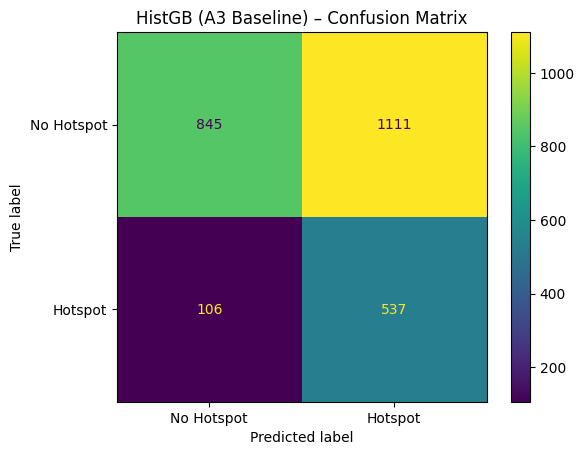

[LightGBM] [Info] Number of positive: 2558, number of negative: 5073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 7631, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335212 -> initscore=-0.684707
[LightGBM] [Info] Start training from score -0.684707

=== LightGBM (A3 Baseline) ===
Decision threshold = 0.23
Accuracy=0.5121 Precision=0.3188 Recall=0.8554 F1=0.4645
ROC_AUC=0.6765 PR_AUC=0.3714
              precision    recall  f1-score   support

           0       0.89      0.40      0.55      1956
           1       0.32      0.86      0.46       643

    accuracy                           0.51      2599
   macro avg       0.61      0.63      0.51      2599
weighted avg       0.75      0.51      0.53      2599



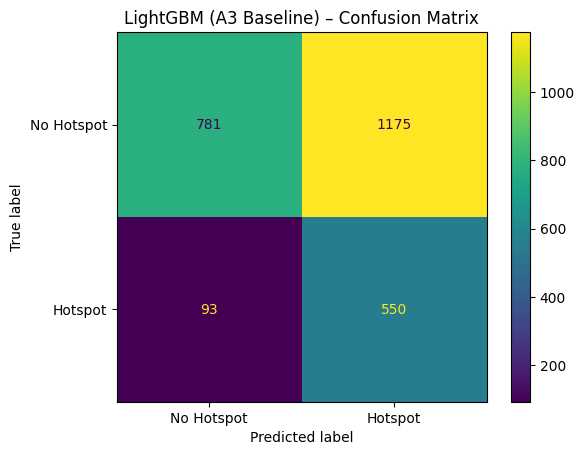


=== CatBoost (A3 Baseline) ===
Decision threshold = 0.29
Accuracy=0.5441 Precision=0.3317 Recall=0.8305 F1=0.4740
ROC_AUC=0.6993 PR_AUC=0.3904
              precision    recall  f1-score   support

           0       0.89      0.45      0.60      1956
           1       0.33      0.83      0.47       643

    accuracy                           0.54      2599
   macro avg       0.61      0.64      0.54      2599
weighted avg       0.75      0.54      0.57      2599



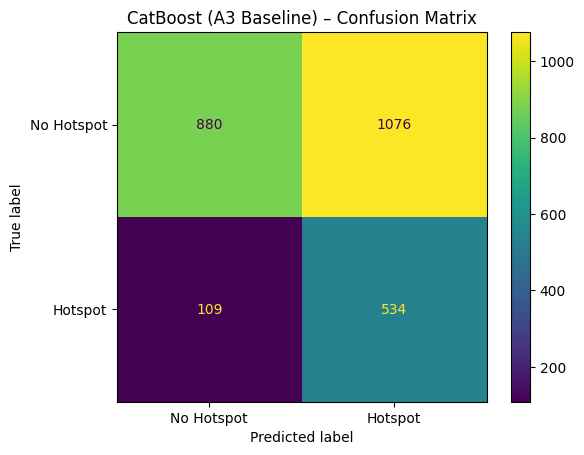


=== AdaBoost (A3 Baseline) ===
Decision threshold = 0.44
Accuracy=0.5956 Precision=0.3520 Recall=0.7543 F1=0.4800
ROC_AUC=0.7091 PR_AUC=0.4083
              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1956
           1       0.35      0.75      0.48       643

    accuracy                           0.60      2599
   macro avg       0.61      0.65      0.57      2599
weighted avg       0.74      0.60      0.62      2599



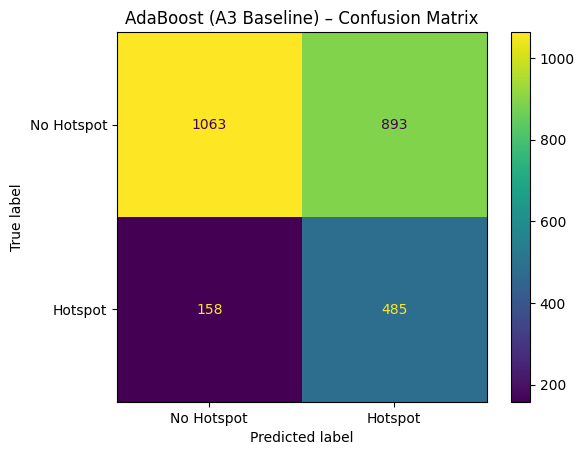

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC,Threshold
3,AdaBoost,0.595614,0.351959,0.754277,0.479960,0.709139,0.408301,0.44
2,CatBoost,0.544055,0.331677,0.830482,0.474035,0.699253,0.390355,0.29
0,HistGB,0.531743,0.325850,0.835148,0.468791,0.686680,0.386616,0.27
1,LightGBM,0.512120,0.318841,0.855365,0.464527,0.676514,0.371447,0.23


In [42]:
#(HistGB, LightGBM, CatBoost, AdaBoost)
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

boost_models = {
    "HistGB": HistGradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(
        n_estimators=600, learning_rate=0.05,
        random_state=42, n_jobs=-1
    ),
    "CatBoost": CatBoostClassifier(
        iterations=400, depth=6, learning_rate=0.05,
        loss_function="Logloss", verbose=False, random_seed=42
    ),
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
        n_estimators=200, learning_rate=0.5, random_state=42
    )
}

results_a3 = []

for name, model in boost_models.items():
    model.fit(X_train_enc, y_train)

    # choose best probability threshold on VAL (same as A2)
    best = find_best_threshold(model, X_val_enc, y_val, metric="f1")
    t = best["threshold"]

    metrics = evaluate_model(model, X_test_enc, y_test, threshold=t, title=f"{name} (A3 Baseline)")
    results_a3.append({"Model": name, **metrics})

df_a3 = pd.DataFrame(results_a3).sort_values("F1", ascending=False)
df_a3


In [41]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


Root impurity (Gini): 0.4456895906713817
Root impurity (Entropy): 0.9201626959858451

=== Decision Tree (Gini) ===
Decision threshold = 0.20
Accuracy=0.3594 Precision=0.2729 Recall=0.9549 F1=0.4245
ROC_AUC=0.6173 PR_AUC=0.3192
              precision    recall  f1-score   support

           0       0.92      0.16      0.28      1956
           1       0.27      0.95      0.42       643

    accuracy                           0.36      2599
   macro avg       0.59      0.56      0.35      2599
weighted avg       0.76      0.36      0.31      2599



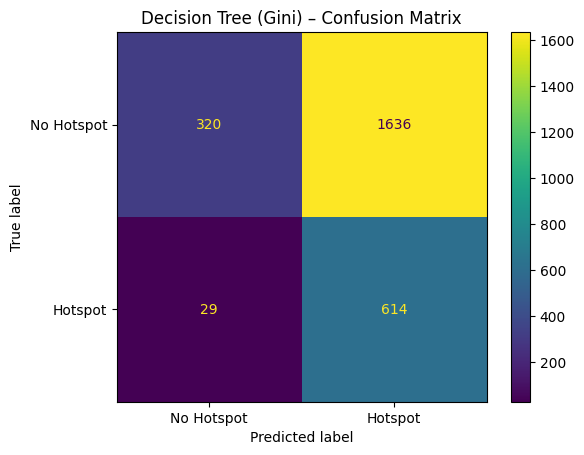


=== Decision Tree (Entropy) ===
Decision threshold = 0.30
Accuracy=0.4529 Precision=0.2925 Recall=0.8538 F1=0.4357
ROC_AUC=0.5896 PR_AUC=0.2890
              precision    recall  f1-score   support

           0       0.87      0.32      0.47      1956
           1       0.29      0.85      0.44       643

    accuracy                           0.45      2599
   macro avg       0.58      0.59      0.45      2599
weighted avg       0.73      0.45      0.46      2599



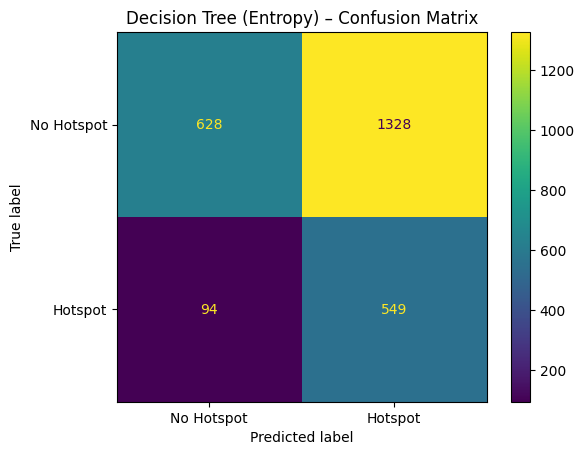

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC,Threshold
1,Decision Tree (Entropy),0.452866,0.292488,0.853810,0.435714,0.589561,0.288998,0.3
0,Decision Tree (Gini),0.359369,0.272889,0.954899,0.424473,0.617336,0.319185,0.2


In [43]:
#Gini vs Entropy decision tree comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)
dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)

dt_gini.fit(X_train_enc, y_train)
dt_entropy.fit(X_train_enc, y_train)

# show impurity at root node (this is the "gini index"/entropy of the root)
print("Root impurity (Gini):", dt_gini.tree_.impurity[0])
print("Root impurity (Entropy):", dt_entropy.tree_.impurity[0])

# choose threshold on VAL and evaluate on TEST
best_g = find_best_threshold(dt_gini, X_val_enc, y_val, metric="f1")["threshold"]
best_e = find_best_threshold(dt_entropy, X_val_enc, y_val, metric="f1")["threshold"]

gini_metrics = evaluate_model(dt_gini, X_test_enc, y_test, threshold=best_g, title="Decision Tree (Gini)")
entropy_metrics = evaluate_model(dt_entropy, X_test_enc, y_test, threshold=best_e, title="Decision Tree (Entropy)")

pd.DataFrame([
    {"Model": "Decision Tree (Gini)", **gini_metrics},
    {"Model": "Decision Tree (Entropy)", **entropy_metrics}
]).sort_values("F1", ascending=False)


### Hyperparameter tuning for adaboost


In [44]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

ada_grid = {
    "n_estimators": [100, 200, 400],
    "learning_rate": [0.05, 0.1, 0.5, 1.0],
    "max_depth": [1, 2, 3]   # depth of base tree
}

best_ada = None

for n in ada_grid["n_estimators"]:
    for lr in ada_grid["learning_rate"]:
        for md in ada_grid["max_depth"]:
            model = AdaBoostClassifier(
                estimator=DecisionTreeClassifier(max_depth=md, random_state=42),
                n_estimators=n,
                learning_rate=lr,
                random_state=42
            )
            model.fit(X_train_enc, y_train)

            best_t = find_best_threshold(model, X_val_enc, y_val, metric="f1")["threshold"]
            proba_val = model.predict_proba(X_val_enc)[:, 1]
            pred_val = (proba_val >= best_t).astype(int)
            f1 = f1_score(y_val, pred_val, zero_division=0)

            if best_ada is None or f1 > best_ada["val_f1"]:
                best_ada = {"model": model, "val_f1": f1, "threshold": best_t,
                            "params": {"n_estimators": n, "learning_rate": lr, "max_depth": md}}

best_ada["params"], best_ada["val_f1"], best_ada["threshold"]


({'n_estimators': 200, 'learning_rate': 1.0, 'max_depth': 3},
 0.5426573426573427,
 np.float64(0.4699999999999999))


=== AdaBoost (Tuned) ===
Decision threshold = 0.47
Accuracy=0.5987 Precision=0.3478 Recall=0.7107 F1=0.4670
ROC_AUC=0.7024 PR_AUC=0.3971
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1956
           1       0.35      0.71      0.47       643

    accuracy                           0.60      2599
   macro avg       0.60      0.64      0.57      2599
weighted avg       0.73      0.60      0.63      2599



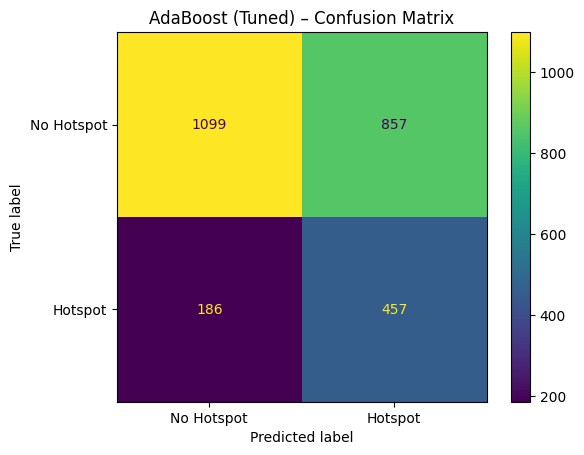

{'Accuracy': 0.5986918045402078,
 'Precision': 0.34779299847793,
 'Recall': 0.7107309486780715,
 'F1': 0.4670413898824732,
 'ROC_AUC': np.float64(0.7023923677037913),
 'PR_AUC': np.float64(0.3970989878517651),
 'Threshold': np.float64(0.4699999999999999)}

In [45]:
#Evaluate tuned AdaBoost on TEST:
ada_tuned_metrics = evaluate_model(
    best_ada["model"], X_test_enc, y_test,
    threshold=best_ada["threshold"],
    title="AdaBoost (Tuned)"
)
ada_tuned_metrics



In [46]:
ada_tuned = best_ada["model"]


In [47]:
##Probability calibration
from sklearn.calibration import CalibratedClassifierCV

# Calibrate using VALIDATION set (no leakage)
ada_cal = CalibratedClassifierCV(
    ada_tuned,
    method="sigmoid",   # Platt scaling
    cv="prefit"
)

ada_cal.fit(X_val_enc, y_val)



CalibratedClassifierCV(cv='prefit',
                       estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                                     random_state=42),
                                                    n_estimators=200,
                                                    random_state=42))

In [48]:
#Threshold selection (after calibration)
best_t_cal = find_best_threshold(
    ada_cal,
    X_val_enc,
    y_val,
    metric="f1"   # or "recall" if business priority
)

best_t_cal



{'threshold': np.float64(0.27999999999999997),
 'score': 0.550531914893617,
 'precision': 0.42768595041322316,
 'recall': 0.7723880597014925,
 'f1': 0.550531914893617}


=== AdaBoost (Tuned + Calibrated) ===
Decision threshold = 0.28
Accuracy=0.5856 Precision=0.3472 Recall=0.7667 F1=0.4779
ROC_AUC=0.7024 PR_AUC=0.3971
              precision    recall  f1-score   support

           0       0.87      0.53      0.66      1956
           1       0.35      0.77      0.48       643

    accuracy                           0.59      2599
   macro avg       0.61      0.65      0.57      2599
weighted avg       0.74      0.59      0.61      2599



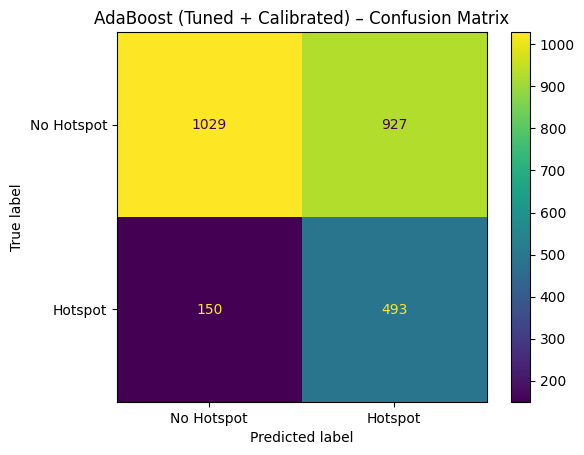

{'Accuracy': 0.5856098499422855,
 'Precision': 0.3471830985915493,
 'Recall': 0.7667185069984448,
 'F1': 0.4779447406689287,
 'ROC_AUC': np.float64(0.7023923677037913),
 'PR_AUC': np.float64(0.3970989878517651),
 'Threshold': np.float64(0.27999999999999997)}

In [49]:
#Final TEST evaluation (confusion matrix)
final_ada_metrics = evaluate_model(
    ada_cal,
    X_test_enc,
    y_test,
    threshold=best_t_cal["threshold"],
    title="AdaBoost (Tuned + Calibrated)"
)

final_ada_metrics


In [63]:
ada_cal_metrics = final_ada_metrics

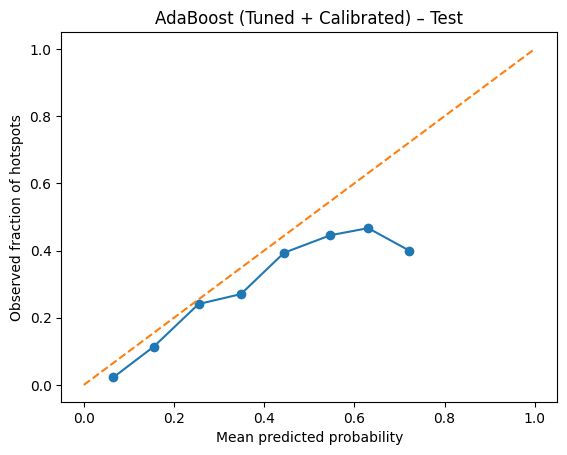

Brier score: 0.1725026021404035


In [50]:
#Evaluate calibration quality
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

def plot_calibration(model, X, y, title):
    proba = model.predict_proba(X)[:, 1]
    frac_pos, mean_pred = calibration_curve(y, proba, n_bins=10)

    plt.figure()
    plt.plot(mean_pred, frac_pos, marker="o")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title(title)
    plt.xlabel("Mean predicted probability")
    plt.ylabel("Observed fraction of hotspots")
    plt.show()

# Calibration plot + Brier score on TEST
plot_calibration(ada_cal, X_test_enc, y_test, "AdaBoost (Tuned + Calibrated) – Test")

print("Brier score:",
      brier_score_loss(y_test, ada_cal.predict_proba(X_test_enc)[:,1]))


In [51]:
#Tune CatBoost (small grid)
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

cat_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7],
    "iterations": [300, 600]
}

best_cat = None

for depth in cat_grid["depth"]:
    for lr in cat_grid["learning_rate"]:
        for l2 in cat_grid["l2_leaf_reg"]:
            for iters in cat_grid["iterations"]:
                model = CatBoostClassifier(
                    iterations=iters,
                    depth=depth,
                    learning_rate=lr,
                    l2_leaf_reg=l2,
                    loss_function="Logloss",
                    verbose=False,
                    random_seed=42
                )
                model.fit(X_train_enc, y_train)

                best_t = find_best_threshold(model, X_val_enc, y_val, metric="f1")["threshold"]
                proba_val = model.predict_proba(X_val_enc)[:, 1]
                pred_val = (proba_val >= best_t).astype(int)
                f1 = f1_score(y_val, pred_val, zero_division=0)

                if best_cat is None or f1 > best_cat["val_f1"]:
                    best_cat = {"model": model, "val_f1": f1, "threshold": best_t,
                                "params": {"depth": depth, "learning_rate": lr, "l2_leaf_reg": l2, "iterations": iters}}

best_cat["params"], best_cat["val_f1"], best_cat["threshold"]


({'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'iterations': 600},
 0.5503685503685504,
 np.float64(0.29))


=== CatBoost (Tuned) ===
Decision threshold = 0.29
Accuracy=0.5391 Precision=0.3284 Recall=0.8258 F1=0.4699
ROC_AUC=0.7007 PR_AUC=0.3960
              precision    recall  f1-score   support

           0       0.89      0.44      0.59      1956
           1       0.33      0.83      0.47       643

    accuracy                           0.54      2599
   macro avg       0.61      0.64      0.53      2599
weighted avg       0.75      0.54      0.56      2599



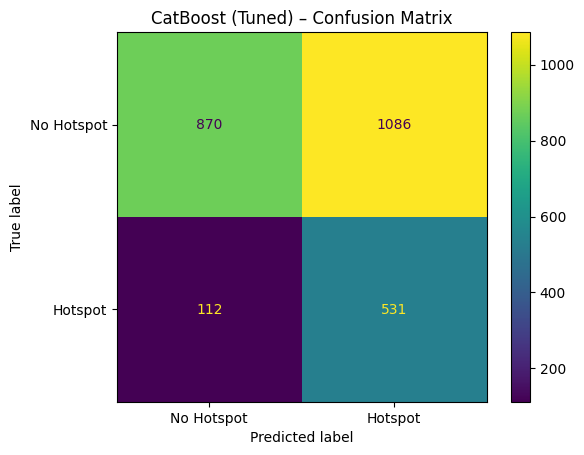

{'Accuracy': 0.5390534821085032,
 'Precision': 0.32838589981447125,
 'Recall': 0.8258164852255054,
 'F1': 0.46991150442477875,
 'ROC_AUC': np.float64(0.7006574658028732),
 'PR_AUC': np.float64(0.395987102411625),
 'Threshold': np.float64(0.29)}

In [52]:
#Evaluate tuned CatBoost on TEST:
cat_tuned_metrics = evaluate_model(
    best_cat["model"], X_test_enc, y_test,
    threshold=best_cat["threshold"],
    title="CatBoost (Tuned)"
)
cat_tuned_metrics


In [64]:
import pandas as pd

rows = []

# A2 baseline results
if "results_a2" in globals():
    for r in results_a2:
        rows.append({"Stage": "A2 Baseline", **r})

# A3 baseline results
if "results_a3" in globals():
    for r in results_a3:
        rows.append({"Stage": "A3 Baseline", **r})

# Add tuned/calibrated results (only if they exist)
if "ada_tuned_metrics" in globals():
    rows.append({"Stage": "Tuned", "Model": "AdaBoost (Tuned)", **ada_tuned_metrics})

if "ada_cal_metrics" in globals():
    rows.append({"Stage": "Calibrated", "Model": "AdaBoost (Tuned + Calibrated)", **ada_cal_metrics})

# Example: include tuned catboost if you made it
if "cat_tuned_metrics" in globals():
    rows.append({"Stage": "Tuned", "Model": "CatBoost (Tuned)", **cat_tuned_metrics})

# Example: include tuned xgb/gbm if you made it
if "tuned_xgb_metrics" in globals():
    rows.append({"Stage": "Tuned", "Model": "XGBoost (Tuned)", **tuned_xgb_metrics})

if "tuned_gbm_metrics" in globals():
    rows.append({"Stage": "Tuned", "Model": "GBM (Tuned)", **tuned_gbm_metrics})

final_compare = pd.DataFrame(rows)

# Standardize column order if present


desired_cols = ["Stage","Model","Accuracy","Precision","Recall","F1","ROC_AUC","PR_AUC","Threshold"]
final_compare = final_compare[[c for c in desired_cols if c in final_compare.columns]]

final_compare = final_compare.sort_values(["F1","Recall","PR_AUC"], ascending=False).reset_index(drop=True)
final_compare


,Stage,Model,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC,Threshold
0,A2 Baseline,GBM,0.590612,0.350603,0.768274,0.481481,0.704119,0.403571,0.33
1,A3 Baseline,AdaBoost,0.595614,0.351959,0.754277,0.479960,0.709139,0.408301,0.44
2,Tuned,GBM (Tuned),0.541362,0.332928,0.850700,0.478565,0.704085,0.400330,0.28
3,Calibrated,AdaBoost (Tuned + Calibrated),0.585610,0.347183,0.766719,0.477945,0.702392,0.397099,0.28
4,Tuned,XGBoost (Tuned),0.539823,0.332119,0.850700,0.477729,0.703711,0.395542,0.28
5,A2 Baseline,XGBoost,0.535975,0.330115,0.850700,0.475652,0.701686,0.395216,0.28
6,A3 Baseline,CatBoost,0.544055,0.331677,0.830482,0.474035,0.699253,0.390355,0.29
7,Tuned,CatBoost (Tuned),0.539053,0.328386,0.825816,0.469912,0.700657,0.395987,0.29
8,A3 Baseline,HistGB,0.531743,0.325850,0.835148,0.468791,0.686680,0.386616,0.27
9,Tuned,AdaBoost (Tuned),0.598692,0.347793,0.710731,0.467041,0.702392,0.397099,0.47


In [54]:
# Choose by F1 (balanced) OR by Recall (maximize hotspot capture)
champion_row = final_compare.sort_values("F1", ascending=False).iloc[0]
# champion_row = final_compare.sort_values("Recall", ascending=False).iloc[0]

champion_row


,0
Stage,A2 Baseline
Model,GBM
Accuracy,0.590612
Precision,0.350603
Recall,0.768274
F1,0.481481
ROC_AUC,0.704119
PR_AUC,0.403571
Threshold,0.33


In [55]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# background + sample (keep small)
X_bg = shap.sample(X_train_enc, 50, random_state=42)
X_sample = shap.sample(X_test_enc, 100, random_state=42)

explainer = shap.KernelExplainer(ada_tuned.predict_proba, X_bg)

# SHAP values for both classes
shap_values = explainer.shap_values(X_sample, nsamples=100)

# Extract class 1 matrix robustly
if isinstance(shap_values, list):
    sv_mat = shap_values[1]          # shape (n_samples, n_features)
    base = explainer.expected_value[1]
else:
    sv_mat = shap_values[:, :, 1]
    base = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

print("X_sample:", X_sample.shape, "sv_mat:", sv_mat.shape)




  0%|          | 0/100 [00:00<?, ?it/s]

X_sample: (100, 48) sv_mat: (100, 48)


In [56]:
proba = ada_tuned.predict_proba(X_sample)[:, 1]
idx_to_explain = int(np.argmax(proba))   # most hotspot-like row
idx_to_explain


33

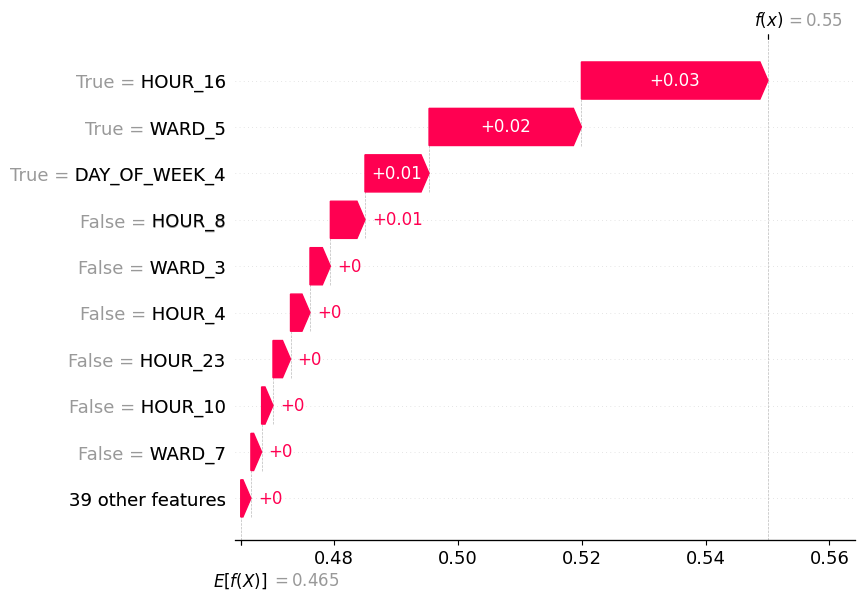

In [57]:
sv = sv_mat[idx_to_explain]  # shap values for that one row

explanation = shap.Explanation(
    values=sv,
    base_values=base,
    data=X_sample.iloc[idx_to_explain],
    feature_names=X_sample.columns
)

plt.figure(figsize=(10, 6))
shap.plots.waterfall(explanation, show=True)


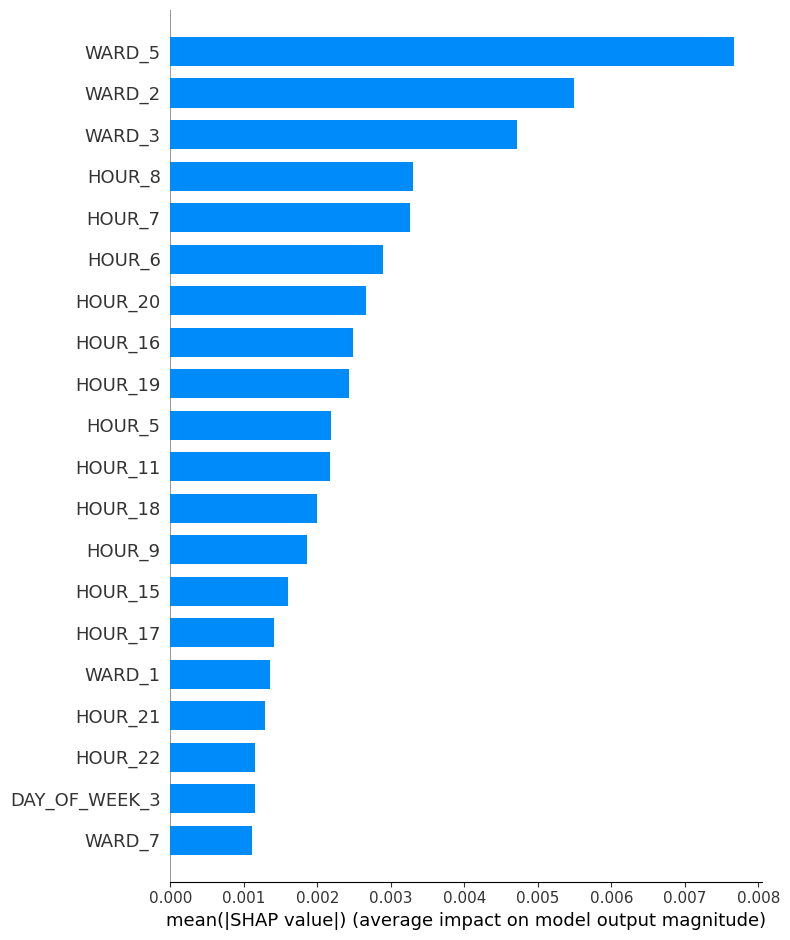

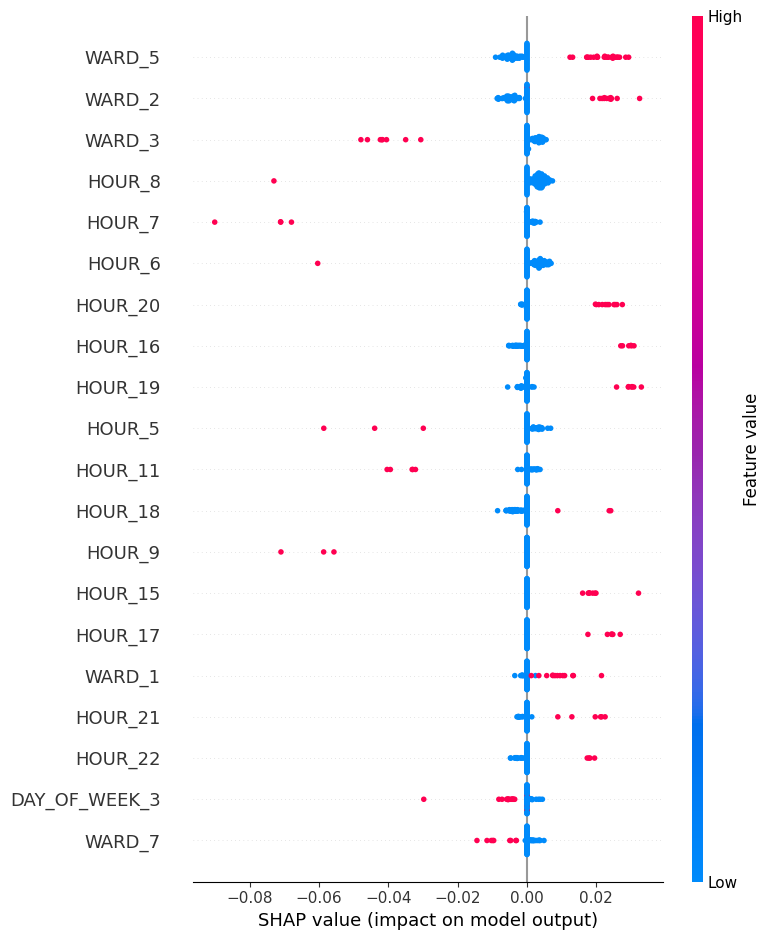

In [58]:
shap.summary_plot(sv_mat, X_sample, plot_type="bar")
shap.summary_plot(sv_mat, X_sample)
